簡介  
機械學習&深度學習步驟
1. 準備資料  
    1.1. 監督式學習  
    1.2. 非監督式學習  
    1.3. 半監督式學習 (隨環境演進，由環境反饋答案)  
2. 建立訓練模型  
3. 利用模型預測  
    1.1 監督式學習  
            -. 無大小關係 (存活與否,顏色 ...) <- 分類 Classification  
            -. 有大小關係 (年齡,價格 ...) <- 回歸 Regression  
    1.2 非監督式學習  
            -. 無大小關係 <- 分群Clustering  
    1.3 強化學習 <- Reinforcement learning

Classification

In [3]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
x = pd.DataFrame(iris["data"], columns=iris["feature_names"])
y = iris["target"]

df = x[:]
df["ans"] = iris["target"]

C:\Users\李重誼\AppData\Local\Temp\ipykernel_10948\1044932012.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ans"] = iris["target"]


<Axes: >

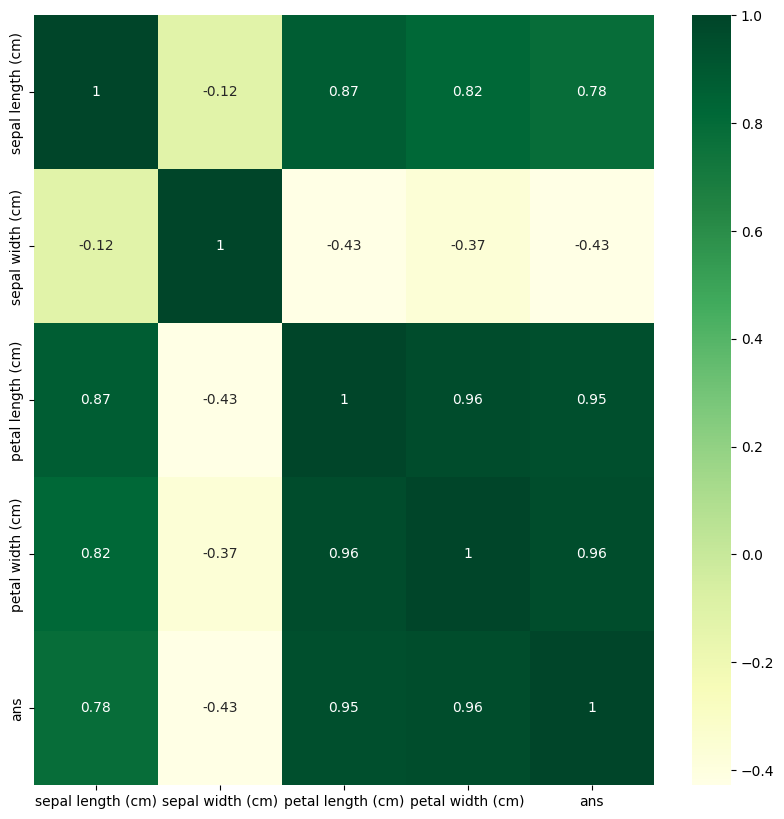

In [6]:
# 思序二 找出資料特徵 與 target的相關性
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


df.astype("float").corr()
# 確認資料的相關係數，並以浮點樹呈現 (機械學習需用浮點數)

plt.figure(figsize=(10,10))
sns.heatmap(df.astype("float").corr(), annot=True, cmap="YlGn")
# 將相關係數 以熱度圖呈現
# annot 是否顯示 相關係數
# cmap 更改圖像顏色 (https://matplotlib.org/stable/gallery/color/colormap_reference.html)
# plt.figure 調整圖像大小

In [3]:
# 思序三 將資料分成: 實驗組(90%) 對照組(10%)
from sklearn.model_selection import train_test_split
import numpy as np 
# train_test_split 回傳值 (特徵90%,特徵10%,答案90%,答案10%)


x_np = np.array(x)
y_np = np.array(y)

x_train, x_test, y_train, y_test = train_test_split(x_np, y_np, test_size=0.1)
# 分割array_x / 分割array_y
# 比例 9:1

In [4]:
# 思序四 做成決策樹 訓練模型(將資料導入) 繪出決策樹
from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier(max_depth=3)
# 做成決策樹

clf.fit(x_train, y_train)
# 訓練完畢

DecisionTreeClassifier(max_depth=3)

[Text(0.375, 0.875, 'petal width (cm) <= 0.8\ngini = 0.666\nsamples = 135\nvalue = [47, 45, 43]\nclass = setosa'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 47\nvalue = [47, 0, 0]\nclass = setosa'),
 Text(0.5, 0.625, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 88\nvalue = [0, 45, 43]\nclass = versicolor'),
 Text(0.25, 0.375, 'petal length (cm) <= 4.95\ngini = 0.183\nsamples = 49\nvalue = [0, 44, 5]\nclass = versicolor'),
 Text(0.125, 0.125, 'gini = 0.045\nsamples = 43\nvalue = [0, 42, 1]\nclass = versicolor'),
 Text(0.375, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(0.75, 0.375, 'petal length (cm) <= 4.85\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]\nclass = virginica'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 36\nvalue = [0, 0, 36]\nclass = virginica')]

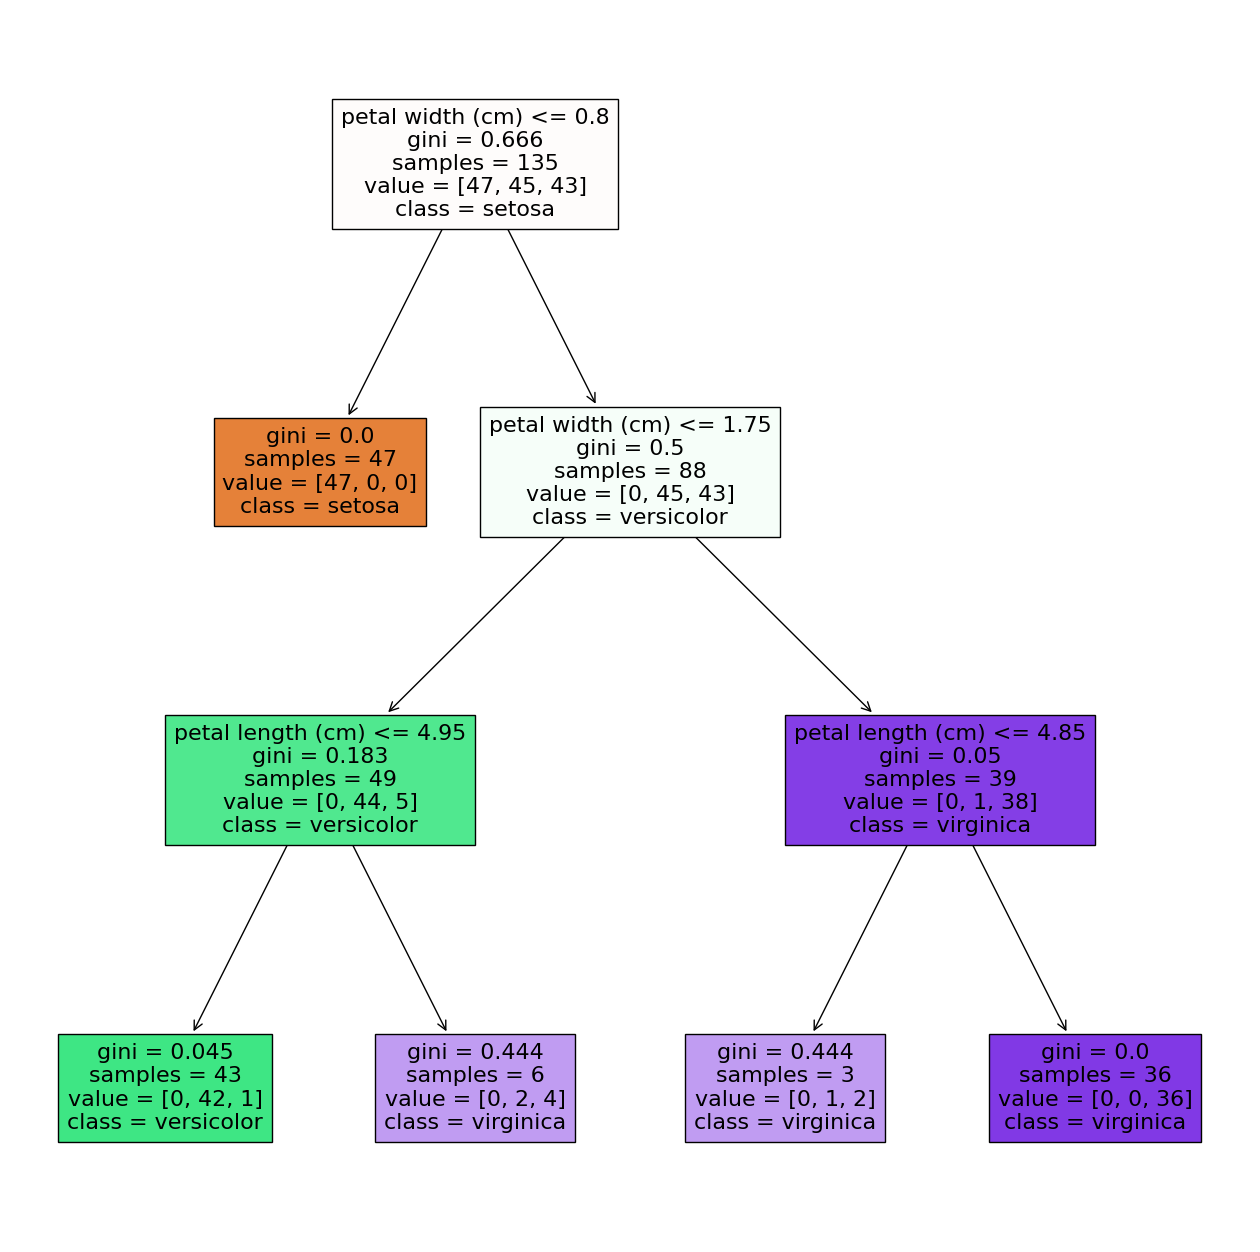

In [5]:
# 思序五 繪出決策樹
from sklearn.tree import plot_tree   # 之前課程是用export_graphviz


plt.figure(figsize=(16,16))
plot_tree(clf, feature_names=iris["feature_names"], class_names= iris["target_names"], filled=True)
# clf           分類樹
# feature_names 特徵的欄位名稱
# class_names   答案的種類 (分類的標的群)
# filled        是否繪製顏色

In [6]:
# 思序六 有決策樹後，可以開始預測
pre = clf.predict(x_test)
# 已經使用 90%x & 90%y 建立決策樹，將其餘10%x 帶入此決策樹並印出答案


print(pre)      
print(y_test)   # 印出其餘10%y 比對答案

[0 2 0 1 0 1 2 1 2 1 2 1 2 2 2]
[0 2 0 1 0 1 2 1 2 1 2 1 2 2 2]


In [7]:
# 思序七 快速比對答案的方法
from sklearn.metrics import accuracy_score
accuracy_score(pre,y_test)

1.0

In [8]:
# 思序八 除了得知正確率，想了解實際那些數據錯誤，可以使用 混淆矩陣
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pre))

,0,1,2
0,3,0,0
1,0,5,0
2,0,0,7


Regression

In [9]:
# 思序一 整理資料
from sklearn.datasets import fetch_california_housing
import pandas as pd


ca = fetch_california_housing()
# load data

x = pd.DataFrame(ca["data"], columns=ca["feature_names"])
y = ca["target"]
# 訓練用的資料

df = pd.DataFrame(ca["data"], columns=ca["feature_names"])
df["target"] = ca["target"]
# 用來找相關性的資料

In [10]:
# 思序二 轉array & 分割資料
from sklearn.model_selection import train_test_split
import numpy as np


xarray = np.array(x)
yarray = np.array(y)
# 轉乘array

x_train, x_test, y_train, y_test = train_test_split(xarray, yarray, test_size=0.1)
print(x_train.shape)   # (18576, 8) 
print(x_test.shape)    # (2064, 8)
print(y_train.shape)   # (18576,)
print(y_test.shape)    # (2064,)

(18576, 8)
(2064, 8)
(18576,)
(2064,)


In [11]:
# 思序三 決策樹 & 餵資料
from sklearn.tree import DecisionTreeRegressor


reg =  DecisionTreeRegressor(max_depth=4)
reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4)

[Text(0.5, 0.9, 'MedInc <= 5.075\nsquared_error = 1.332\nsamples = 18576\nvalue = 2.071'),
 Text(0.25, 0.7, 'MedInc <= 3.076\nsquared_error = 0.84\nsamples = 14731\nvalue = 1.743'),
 Text(0.125, 0.5, 'AveRooms <= 4.314\nsquared_error = 0.558\nsamples = 7024\nvalue = 1.357'),
 Text(0.0625, 0.3, 'AveOccup <= 2.487\nsquared_error = 0.666\nsamples = 2967\nvalue = 1.62'),
 Text(0.03125, 0.1, 'squared_error = 1.041\nsamples = 913\nvalue = 2.018'),
 Text(0.09375, 0.1, 'squared_error = 0.398\nsamples = 2054\nvalue = 1.444'),
 Text(0.1875, 0.3, 'MedInc <= 2.405\nsquared_error = 0.391\nsamples = 4057\nvalue = 1.164'),
 Text(0.15625, 0.1, 'squared_error = 0.282\nsamples = 2012\nvalue = 0.963'),
 Text(0.21875, 0.1, 'squared_error = 0.421\nsamples = 2045\nvalue = 1.362'),
 Text(0.375, 0.5, 'AveOccup <= 2.396\nsquared_error = 0.838\nsamples = 7707\nvalue = 2.095'),
 Text(0.3125, 0.3, 'HouseAge <= 19.5\nsquared_error = 1.279\nsamples = 1898\nvalue = 2.764'),
 Text(0.28125, 0.1, 'squared_error = 0.69\

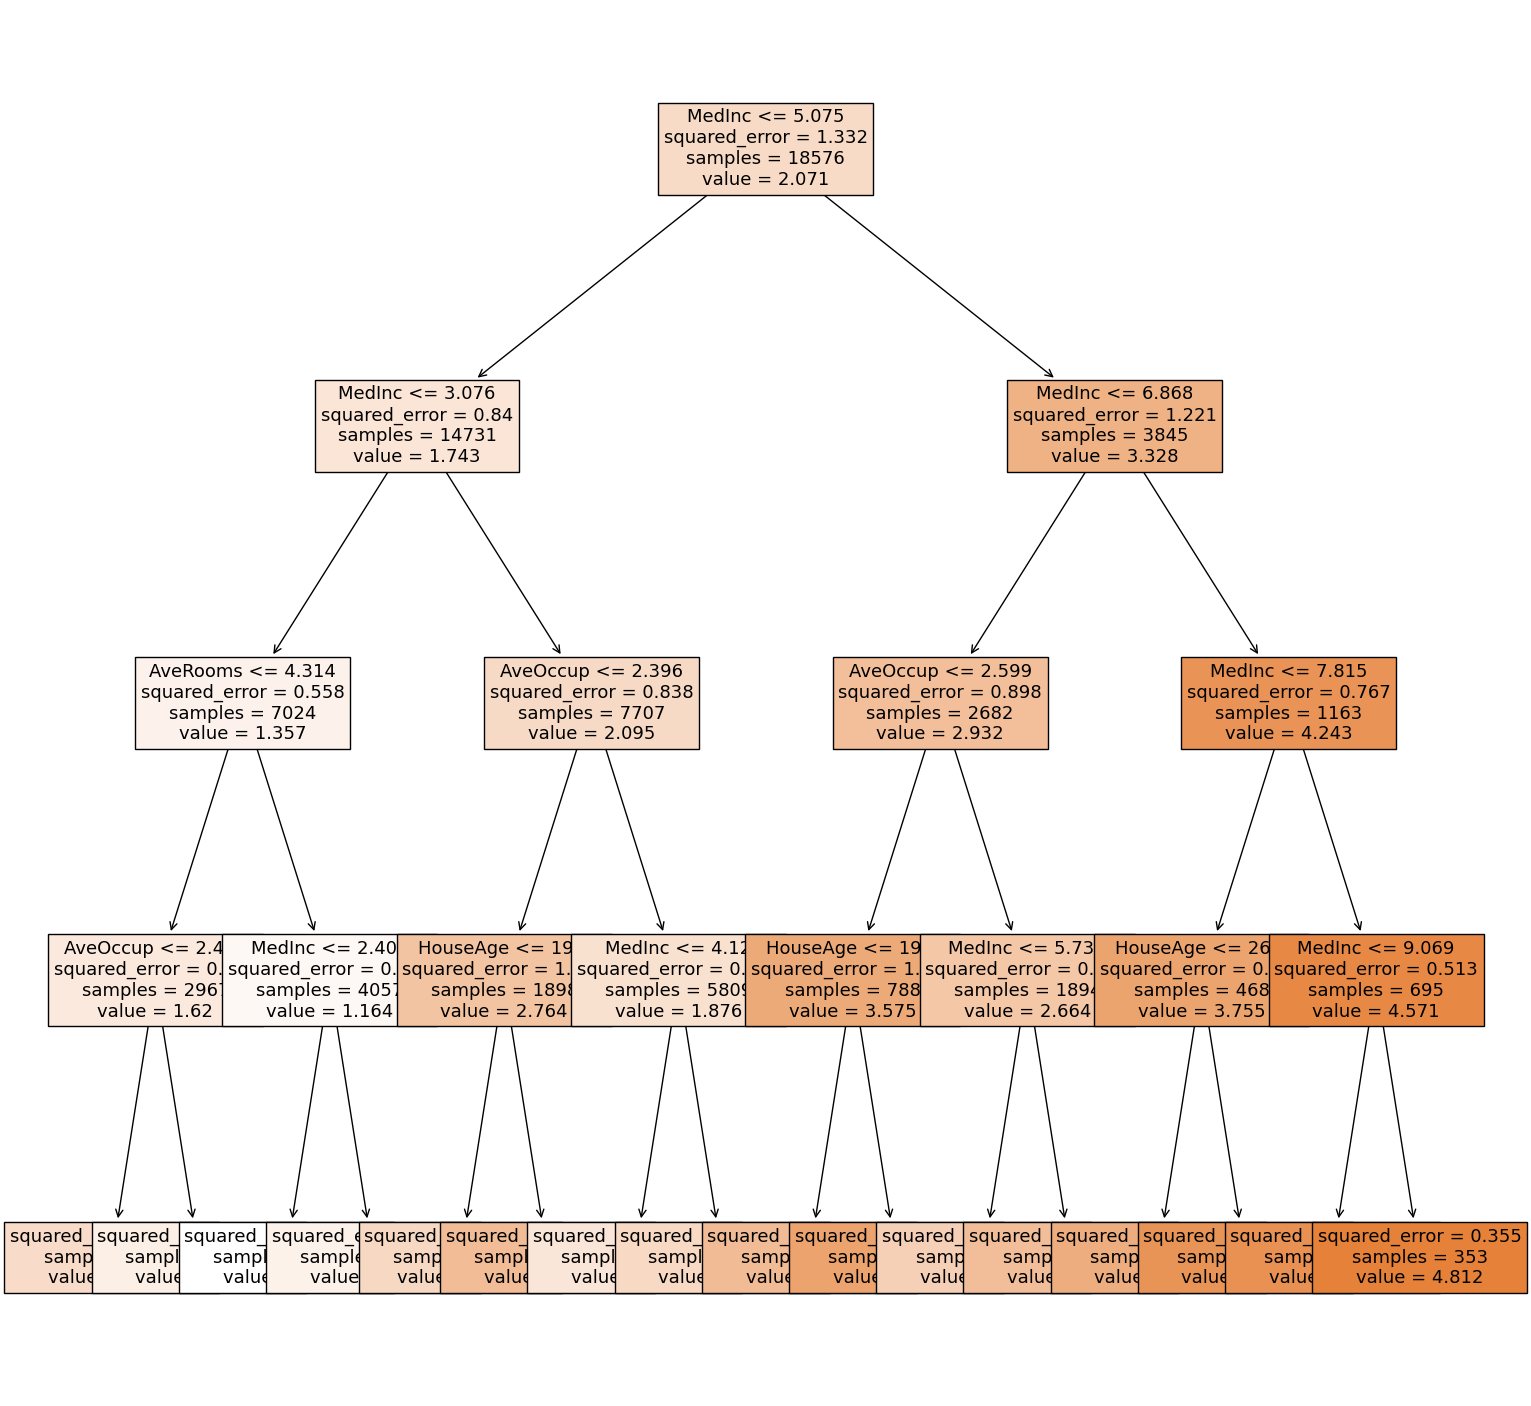

In [12]:
# 思序四 繪出決策樹
from sklearn.tree import plot_tree


plt.figure(figsize=(18,18))
plot_tree(reg, feature_names=ca["feature_names"], filled=True, fontsize=13)
# reg           決策樹
# feature_names 特徵的欄位名稱
# filled        是否繪製顏色
# fontsize      調整文字大小

In [13]:
# 思序五 印出預測結果 & 正確結果
# Regression 沒有accuracy score 因為沒有所謂的正確分類

print("預測結果: ", reg.predict(x_test))
print("正確結果: ", y_test)

預測結果:  [2.11810345 0.96316801 0.96316801 ... 3.45945073 2.11810345 1.44362076]
正確結果:  [1.43  0.838 0.546 ... 2.621 1.755 1.438]


In [14]:
# Note (等等會用到的符號)
# |fi = 所有測試資料值的平均  
# fi = 第i筆測試資料的值      (real)
# pi = 第i筆測試資料預測的值  (predict)

# b = (fi - |fi) ** 2
#     測試資料的值 減去 所有資料值的平均 後 平方 -> 資料範圍(資料的廣度)

# a = (pi - |fi) ** 2
#     預測值 減去 所有資料值的平均 後 平方

# a / b = 0, a=0  超級準 100%準
# a / b = 1, a=b  亂猜   每次都猜平均值

# 0 ~ a / b ~ 1
# 準          不準   -> 違反直覺 所以 1 - a/b

# 1-a/b 就是 r2 score 用以表達regression 準確程度 越接近1越準確 

In [15]:
# 思序六 r2 score
from sklearn.metrics import r2_score


print("r2 score:", r2_score(y_test, reg.predict(x_test)))

r2 score: 0.5845282248830443


Cluster

In [16]:
# 分群算法 與其邏輯 KMeans

# 一群中，隨機取三個點
# 以此三點為圓心，分類資料

# 修正步驟
# 重新對三個群，找圓心
# 對新的圓心，再次分群

# 重複修正步驟，直到圓心不會改變為止

In [17]:
# 思序一 整理資料
from sklearn.datasets import load_iris


iris = load_iris()

x = pd.DataFrame(iris["data"], columns=iris["feature_names"])
y = iris["target"]

df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["target"] = iris["target"]

In [18]:
# 思序二 轉array & 分割資料
from sklearn.model_selection import train_test_split


arrayx = np.array(x)
arrayy = np.array(y)

x_train, x_test, y_test, y_test = train_test_split(arrayx, arrayy, test_size=0.1)

In [19]:
# 思序三 分群設定 & 餵資料 
from sklearn.cluster import KMeans


clu = KMeans(n_clusters=3)
# 如果是iris，已知幾種，可以直接寫3

clu.fit(x_train)
# 分群時，沒有答案，所以這邊只丟訓練資料

clu.labels_
# 系統自動將訓練資料貼上標籤 不一定等於target上面的值!!

c:\Users\李重誼\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 2, 2, 2, 1, 0, 1, 2, 2, 1, 1, 2, 1, 0, 1, 1, 1, 2, 2, 0, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 0, 0, 1, 1, 1, 2, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 1, 0, 2, 1, 1, 1, 0, 0, 0, 2, 1, 2, 2, 0, 0, 1,
       2, 2, 0, 1, 1, 0, 0, 1, 1, 2, 2, 2, 0, 2, 2, 0, 2, 1, 2, 1, 1, 0,
       2, 2, 0, 0, 0, 1, 1, 1, 2, 2, 1, 0, 0, 1, 2, 1, 0, 0, 2, 2, 1, 0,
       1, 0, 1, 1, 1, 2, 2, 0, 2, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0, 0, 1, 2,
       0, 0, 0])

In [20]:
# 不知道K值時

# a = 與同圈內其他人的平均距離
# b = 與最近圈，該圈內其他人的平均距離

# 我們只會探討 a <= b 的情形
# 希望 a越小越好 b越大越好   此處違反直覺   所以取1/b
# 希望 a越小越好 1/b越小越好
# a * 1/b 越小越好
# 此值稱為 Silhouette Score

In [21]:
# 思序四 利用迴圈 尋找最適合的k值
from sklearn.metrics import silhouette_score


# x       沒有target的資料    這邊可以直接用array
# arrayx  轉成array的x        這邊可以直接用array

plotx = []
ploty = []
# 創造空list 儲存資料

for k in range(2,6):
    clu = KMeans(n_clusters=k, n_init="auto")
    # n_cluster 需要調整 從2嘗試到5
    # n_init 未來版本會更動，先放auto

    clu.fit(arrayx)
    # fit

    s = silhouette_score(arrayx, clu.labels_)
    # score

    plotx.append(k)
    ploty.append(s)
    # 將資料放入空list

print("K值:", plotx)
print("Silhouette Score:", ploty)
# 迴圈完成後，再一次印出來
# 綜合，k值為2的時候，分數最高

K值: [2, 3, 4, 5]
Silhouette Score: [0.6810461692117462, 0.5528190123564095, 0.49805050499728737, 0.4609502384437903]


Text(0, 0.5, 'Score')

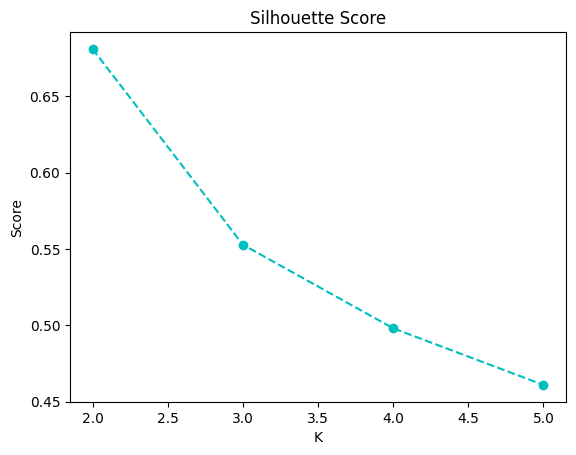

In [22]:
# 如果k值很多，無法一眼判斷，可以用畫圖判斷
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib inline 限定ipynb使用

plt.plot(plotx, ploty, "co--")
plt.title("Silhouette Score")
plt.xlabel("K")
plt.ylabel("Score")
# 圖的各項設定 (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

Classication詩詞-單純貝氏  
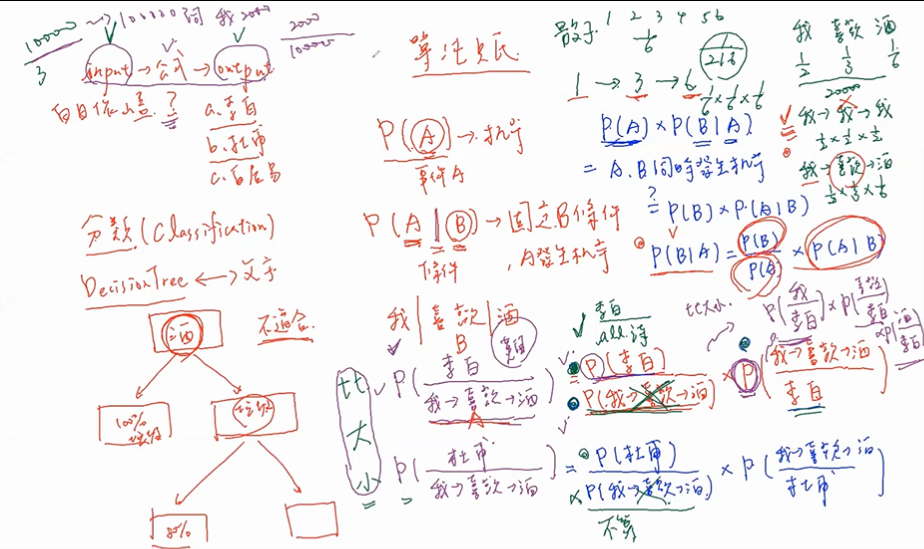
1. 想要計算的機率 = 我喜歡酒的文章，是李白寫的機率
2.           所有詩人挑中李白的機率  
          --------------------------  *  李白寫出我喜歡酒的詩，的機率  
            所有詩挑中我喜歡酒的機率  
  
3.            所有詩人挑中杜甫的機率  
          --------------------------  *  杜甫寫出我喜歡酒的詩，的機率  
            所有詩挑中我喜歡酒的機率  
  
4. 兩者比機率大小時，分母相同，所以不計算  
5. 所有詩人挑中李白的機率 簡單 李白/總樣品數  
6. 李白寫出我喜歡酒的詩，的機率 困難 所以運用單純貝氏  
7. "單純"貝氏:將李白選擇詞彙的過程，比喻為甩骰子過程  (假設過於單純，但比較機率大小則可以適用)  
8. 所以將資料中，李白所有使用的詞彙計算出來，並且計算出使用特定詞彙的機率  

In [23]:
# P(A)    A發生的機率
# P(A|B)  B發生的條件下，A發生的機率

In [24]:
# 思序一 整理資料
import pandas as pd


traindf = pd.read_csv("poem_train.csv", encoding="utf-8")
testdf = pd.read_csv("poem_test.csv", encoding="utf-8")
traindf

,作者,詩名,內容
0,李白,菩薩蠻·平林漠漠煙如織,平林漠漠煙如織，寒山一帶傷心碧。\r\n暝色入高樓，有人樓上愁。玉階空佇立，宿鳥歸飛急。\r...
1,李白,把酒問月,青天有月來幾時，我今停杯一問之：人攀明月不可得，月行卻與人相隨？皎如飛鏡臨丹闕，綠煙滅儘清輝...
2,李白,春思,燕草如碧絲，秦桑低綠枝。當君懷歸日，是妾斷腸時。春風不相識，何事入羅幃。
3,李白,春夜洛城聞笛,誰家玉笛暗飛聲，散入春風滿洛城。此夜曲中聞折柳，何人不起故園情。
4,李白,古風 其十九,西上蓮花山，迢迢見明星。(西上 一作：西嶽)素手把芙蓉，虛步躡太清。霓裳曳廣帶，飄拂升天行。...
...,...,...,...
2726,白居易,彆元九後詠所懷,零落桐葉雨，蕭條槿花風。悠悠早秋意，生此幽閒中。況與故人彆，中懷正無悰。勿雲不相送，心到青門...
2727,白居易,早秋曲江感懷,離離暑雲散，嫋嫋涼風起。池上秋又來，荷花半成子。朱顏易銷歇，白日無窮已。人壽不如山，年光急於...
2728,白居易,東墟晚歇 時退居渭村。,涼風冷露蕭索天，黃蒿紫菊荒涼田。繞塚秋花少顏色，細蟲小蝶飛翻翻。中有騰騰獨行者，手拄漁竿不騎...
2729,白居易,南秦雪,往歲曾為西邑吏，慣從駱口到南秦。\r\n三時雲冷多飛雪，二月山寒少有春。\r\n我思舊事猶惆...


In [25]:
# 思序二 分詞
import jieba


#" ".join(jieba.cut())

In [26]:
# 思序三 將分詞功能，帶入df表格中
def poem(s):
    s.replace("\r", "").replace("\r", "")
    # 去除兩種換行符號

    return " ".join(jieba.cut(s))
    # 返還切割完成的字串

traindf["內容"] = traindf["內容"].apply(poem)
# apply 並將切割的資料帶回原表格

# traindf # 確認成功 

testdf["內容"] = testdf["內容"].apply(poem)
# apply 並將切割的資料帶回原表格

# testdf # 確認成功 

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\李重誼\AppData\Local\Temp\jieba.cache
Loading model cost 1.166 seconds.
Prefix dict has been built successfully.


In [27]:
# 思序四 scikit-learn 答案一定要是整數 所以我們先將答案轉換

trans = {"李白":0, "杜甫":1, "白居易":2}

traindf["作者"] = traindf["作者"].replace(trans)
# 利用dict轉換 並帶回原表格

testdf["作者"] = testdf["作者"].replace(trans)

""
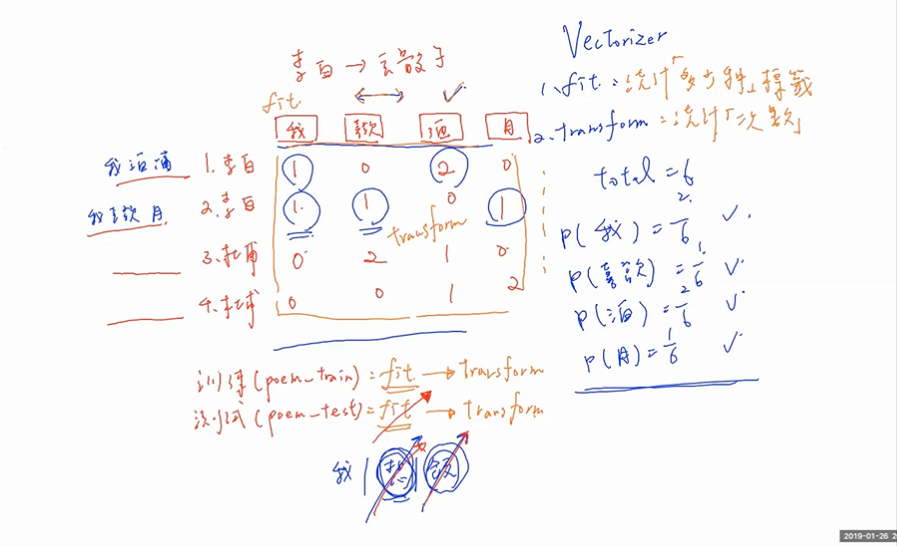  
  
Vectorizer fit 統計有多少種詞彙標籤  
Vectorizer transform 計算各詞彙標籤的出現次數  
  
訓練時，fit & transform  
測試時，transform  
如測試資料，含有訓練資料中沒有出現的詞彙，則捨棄不計算。

In [28]:
# 思序五 統計使用詞彙個數
from sklearn.feature_extraction.text import CountVectorizer


vec = CountVectorizer()

trainvec = vec.fit_transform(traindf["內容"])
# 對訓練資料 貼標籤 計算次數
# trainvec -> 2731x51827 -> 2731首詩 51827種詞彙
# print(trainvec) -> (0, 15827) 1 -> 第0首詩 15827號詞彙 出現1次
# print(vec.vocabulary_) -> 可以看到各個詞彙的標籤號碼

testvec = vec.transform(testdf["內容"])
# 對測試資料 計算次數

單純貝氏的三種分支  
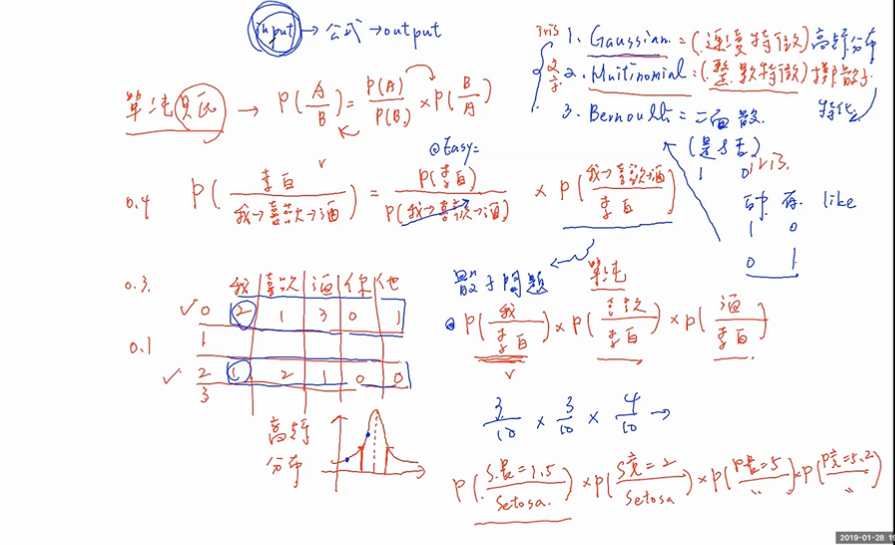  
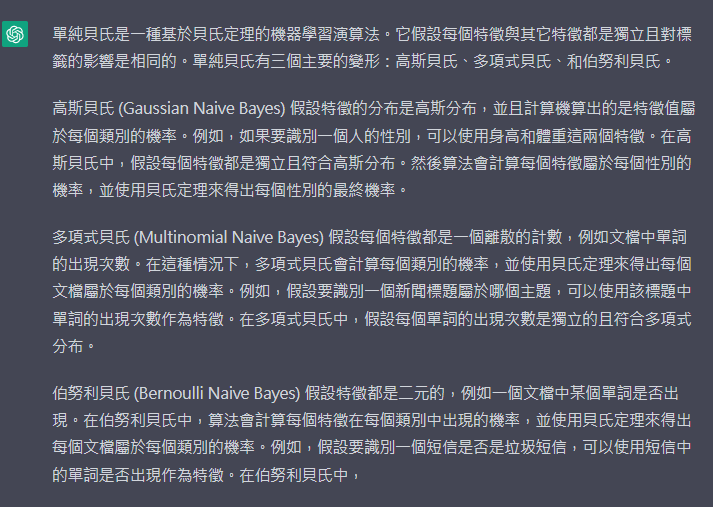  
  
不同分支的使用時機，取決於我們將要input的資料性質而定

In [29]:
# 思序六 因為要做文字分析 使用Multinomial
from sklearn.naive_bayes import MultinomialNB


clf = MultinomialNB()
# 因為仍然是分類問題，我們命名為clf

clf.fit(trainvec, traindf["作者"])
# 剛剛貼完標籤計算完次數的資料, 答案:作者

MultinomialNB()

In [30]:
# 思序七 訓練完後，預測
from sklearn.metrics import accuracy_score


pre = clf.predict(testvec)
print("預測結果:", list(pre))
print("正確結果:", list(testdf["作者"]))
# 帶入測試資料，驗證模型好壞

print("正確率:", accuracy_score(list(pre), list(testdf["作者"])))
# 正確率

預測結果: [0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1]
正確結果: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
正確率: 0.8


In [31]:
# 思序八 模型至此訓練完畢 額外設計: 讓使用者輸入詩詞

s = input("輸入詩詞: ")
# 要predict時，資料型態需要是群集 (list, series)

inputs = [poem(s)]
# 先切割

x = vec.transform(inputs)
# 將輸入的詩，套用到當初建立的模型中 去計算詞彙出現的次數

pre = clf.predict(x)[0]
# 用次數去predict, 我們當初僅輸入一首詩，所以取第一個值

# trans = {"李白":0, "杜甫":1, "白居易":2}
# 這是剛剛用於將作者轉換為數字的dict，我們現在要將答案的數字，再次轉換回作者名稱

trans_n2p = {0:"李白", 1:"杜甫", 2:"白居易"}
print("預測的作者:", trans_n2p[pre])

預測的作者: 杜甫


額外補充

In [32]:
# 是否需要事先篩選特徵?

# TfidfVectorizer
# 事先算出各個詞彙的重要程度
# 但使用此方法，算出結果仍然與單純貝氏結果一樣

# 結論 : 不用事先篩選資料中的特徵

In [33]:
# clf = MultinomialNB(alpha=1)
# 此 alpha 值，為了避免某詞彙的出現次數為0，導致判斷失誤，所以會把所有詞彙的次數加1
# 加多少值，需要是總體資料量決定

# 例子:
# 垃圾郵件訓練資料中，有: 你 / 我 / 他 / 她 四種詞彙
# 但些郵件中 : 你 出現次數為零
# 0 導致後續其他機率計算，都會變為0
# 所以將所有詞彙的出現次數都加上1，避免機率為0的情形出現

# 全部的數值，都加上n   這個動作稱為平滑化
# n=1 時，稱拉普拉斯平滑

實作練習-Kaggle Titanic存活率

Titanic-資料預處理  
1. 缺失值的處理  
    1. 大小 (數字資料) 填入中位數  
    2. 類別 (文字資料) 填入最常出現的資料
2. One Hot Encoding (針對類別是文字資料時常用)
    1. 機械學習 / 深度學習 函示庫在input資料時 只能填入數字
    2. 案例中，上船地點S, C, Q 如直接代入 S=0, C=1, Q=2 分析時 會默認SCQ三者間有大小關係
    3. 作法 額外設三個欄位 S C Q 若於S上傳 S:1(True) C:0(False) Q:0(False)
    4. 詩詞判斷時可以，是因為李白 杜甫 ... 是答案，並不是input的資料 
3. 較難處理的資料  
    1. name 取名字中的特定字串使用
    2. ticket 意義不太明白，可以丟掉
    3. 經過One Hot Encoding的欄位，也可以丟掉  

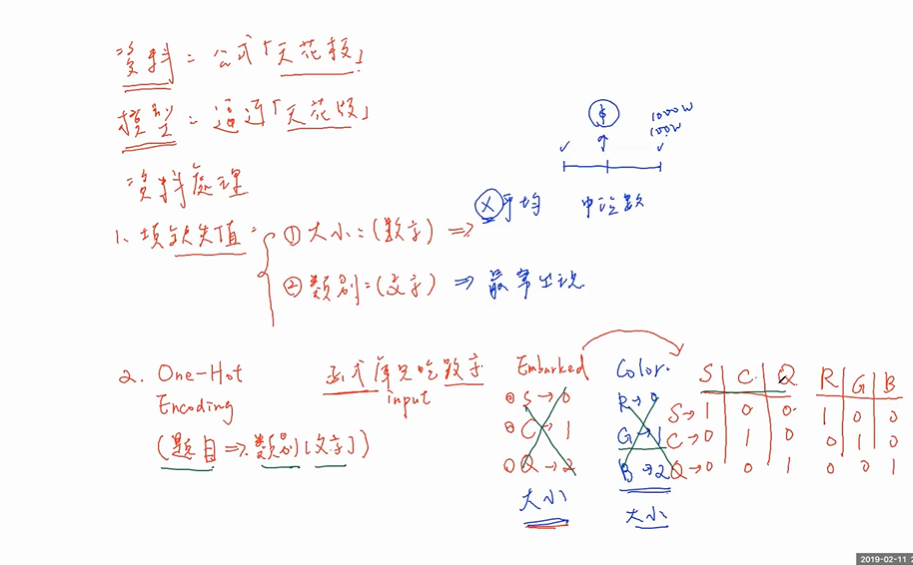

In [34]:
import pandas as pd


traindf = pd.read_csv("train.csv", encoding="utf-8")
testdf = pd.read_csv("test.csv", encoding="utf-8")
# 讀取資料

In [35]:
traindf.isna()
# 檢查資料有無空白值 return True False

traindf.isna().sum()
# 統計個欄位缺多少資料

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
med = traindf.median()
# 找出各個欄位資料的中位數

traindf = traindf.fillna(med)
# 將中位數 填入空值

traindf.isna().sum()
# 再次檢查欄位資料，確實已填補

C:\Users\李重誼\AppData\Local\Temp\ipykernel_9780\2098329645.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  med = traindf.median()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
testdf.isna().sum()
testdf = testdf.fillna(med)
# 測試的資料不用再計算一次中位數，因為測試資料體量較小，訓練資料體量較大較為完整
testdf.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [38]:
# traindf中 Embarked 的資料還有兩個空值
# 缺失值，如果是類別資料，可以直接填上數量最多的類別

traindf["Embarked"].value_counts()
# 計算 Embarked 的資料有什麼 & 出現多少次

most = traindf["Embarked"].value_counts().idxmax()
# idxmax 直接返還數量最大的資料

traindf["Embarked"] = traindf["Embarked"].fillna(most)
# 針對 Embarked欄位 填上缺失值 並帶回原本df

traindf.isna().sum()
# 檢查是否正確填入資料

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [39]:
# 雖然testdf中 Embarked欄位資料沒有缺失 但保險作法是 train資料做什麼 test資料也做

testdf["Embarked"] = testdf["Embarked"].fillna(most)
# 測試的資料也不用再找一次資料最多的欄位!!!

testdf.isna().sum()
# 檢查是否正確填入資料

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [40]:
# traindf
# 檢視那些欄位需要 One Hot encoding
# Pclass, Name, Sex, Embarked 需要處理

# Pclass 可做可不做 因為艙等之間真的有大小關係
# Sex 可做可不做 因為可以想成 是否為男性 True / False

In [41]:
# 處理 train - Embarked / test - Embarked

dummy = pd.get_dummies(traindf["Embarked"])
# get_dummies 可以直接處理

traindf = pd.concat([traindf, dummy], axis=1)   # 如果多次執行，會持續增加欄位，先註解
# 由於可以一次concat多個表格 用list
# axis=0直的接 axis=1橫的接
# 更新回train.df   

In [42]:
dummy = pd.get_dummies(testdf["Embarked"])
testdf = pd.concat([testdf, dummy], axis=1)
testdf

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,S,0,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0,1
416,1308,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,NaN,S,0,0,1


In [43]:
# 處理 train - Sex / test - Sex

dummy = pd.get_dummies(traindf["Sex"])
traindf = pd.concat([traindf, dummy], axis=1)
dummy = pd.get_dummies(testdf["Sex"])
testdf = pd.concat([testdf, dummy], axis=1)

traindf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,1,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,0,0,1,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0,0,0,1


In [44]:
# 處理 train - Name / test - Name   apply
# 先拿一個人名試試看

# mid = "Braund, Mr. Owen Harris".split(",")[-1].split(".")[0]
# mid = mid.replace(" ","")
# mid   # Mr


# 製作流程
def nameflow(name):
    mid = name.split(",")[-1].split(".")[0]
    mid = mid.replace(" ","")
    return mid
    # 定義流程

namescolumn = traindf["Name"].apply(nameflow)
# 發現稱謂種類過多，如果全部One Hot encoding 可能會有過擬合的問題

pd.crosstab(namescolumn, traindf["Survived"]).T
# cosstab 會將兩個欄位資料做成pivot table
# .T 翻轉列表
# 其中 Master 雖然數量尚可接受 但存活與否 幾乎各50% 所以還是可以放棄該資料


Name,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,theCountess
Survived,,,,,,,,,,,,,,,,,
0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [45]:
def nameflow(name):
    mid = name.split(",")[-1].split(".")[0]
    mid = mid.replace(" ","")
    if mid == "Miss":
        return "Miss"
    elif mid == "Mr":
        return "Mr"
    elif mid == "Mrs":
        return "Mrs"
    else:
        return "Throw"

namescolumn = traindf["Name"].apply(nameflow)
dummy = pd.get_dummies(namescolumn)
traindf = pd.concat([traindf, dummy], axis=1)
traindf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,C,Q,S,female,male,Miss,Mr,Mrs,Throw
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,0,0,1,0,1,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,1,0,0,1,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,0,0,1,1,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,0,0,1,1,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,S,0,0,1,0,1,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,S,0,0,1,1,0,1,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,...,S,0,0,1,1,0,1,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,C,1,0,0,0,1,0,1,0,0


In [46]:
namescolumn = testdf["Name"].apply(nameflow)
dummy = pd.get_dummies(namescolumn)
testdf = pd.concat([testdf, dummy], axis=1)
testdf

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,female,male,Miss,Mr,Mrs,Throw
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,S,0,0,1,0,1,0,1,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0,0,1,0,0,0,0,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0,1,0,1,0,1,0,0
416,1308,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,NaN,S,0,0,1,0,1,0,1,0,0


In [47]:
# 最後，將不要的欄位丟掉
traindf.columns
# 檢視現有欄位

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'C', 'Q', 'S', 'female',
       'male', 'Miss', 'Mr', 'Mrs', 'Throw'],
      dtype='object')

In [48]:
# traindf 先把PassengerId drop, test的PassengerId先留著
traindf = traindf.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked','Throw'], axis=1)
testdf = testdf.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked','Throw'], axis=1)
# axis=1 將drop行

traindf

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,Miss,Mr,Mrs
0,0,3,22.0,1,0,7.2500,0,0,1,0,1,0,1,0
1,1,1,38.0,1,0,71.2833,1,0,0,1,0,0,0,1
2,1,3,26.0,0,0,7.9250,0,0,1,1,0,1,0,0
3,1,1,35.0,1,0,53.1000,0,0,1,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,0,1,0,1,0,0,0
887,1,1,19.0,0,0,30.0000,0,0,1,1,0,1,0,0
888,0,3,28.0,1,2,23.4500,0,0,1,1,0,1,0,0
889,1,1,26.0,0,0,30.0000,1,0,0,0,1,0,1,0


Titanic-觀察資料的全貌  
兩種方法: 決策數 / 相關係數圖

<Axes: >

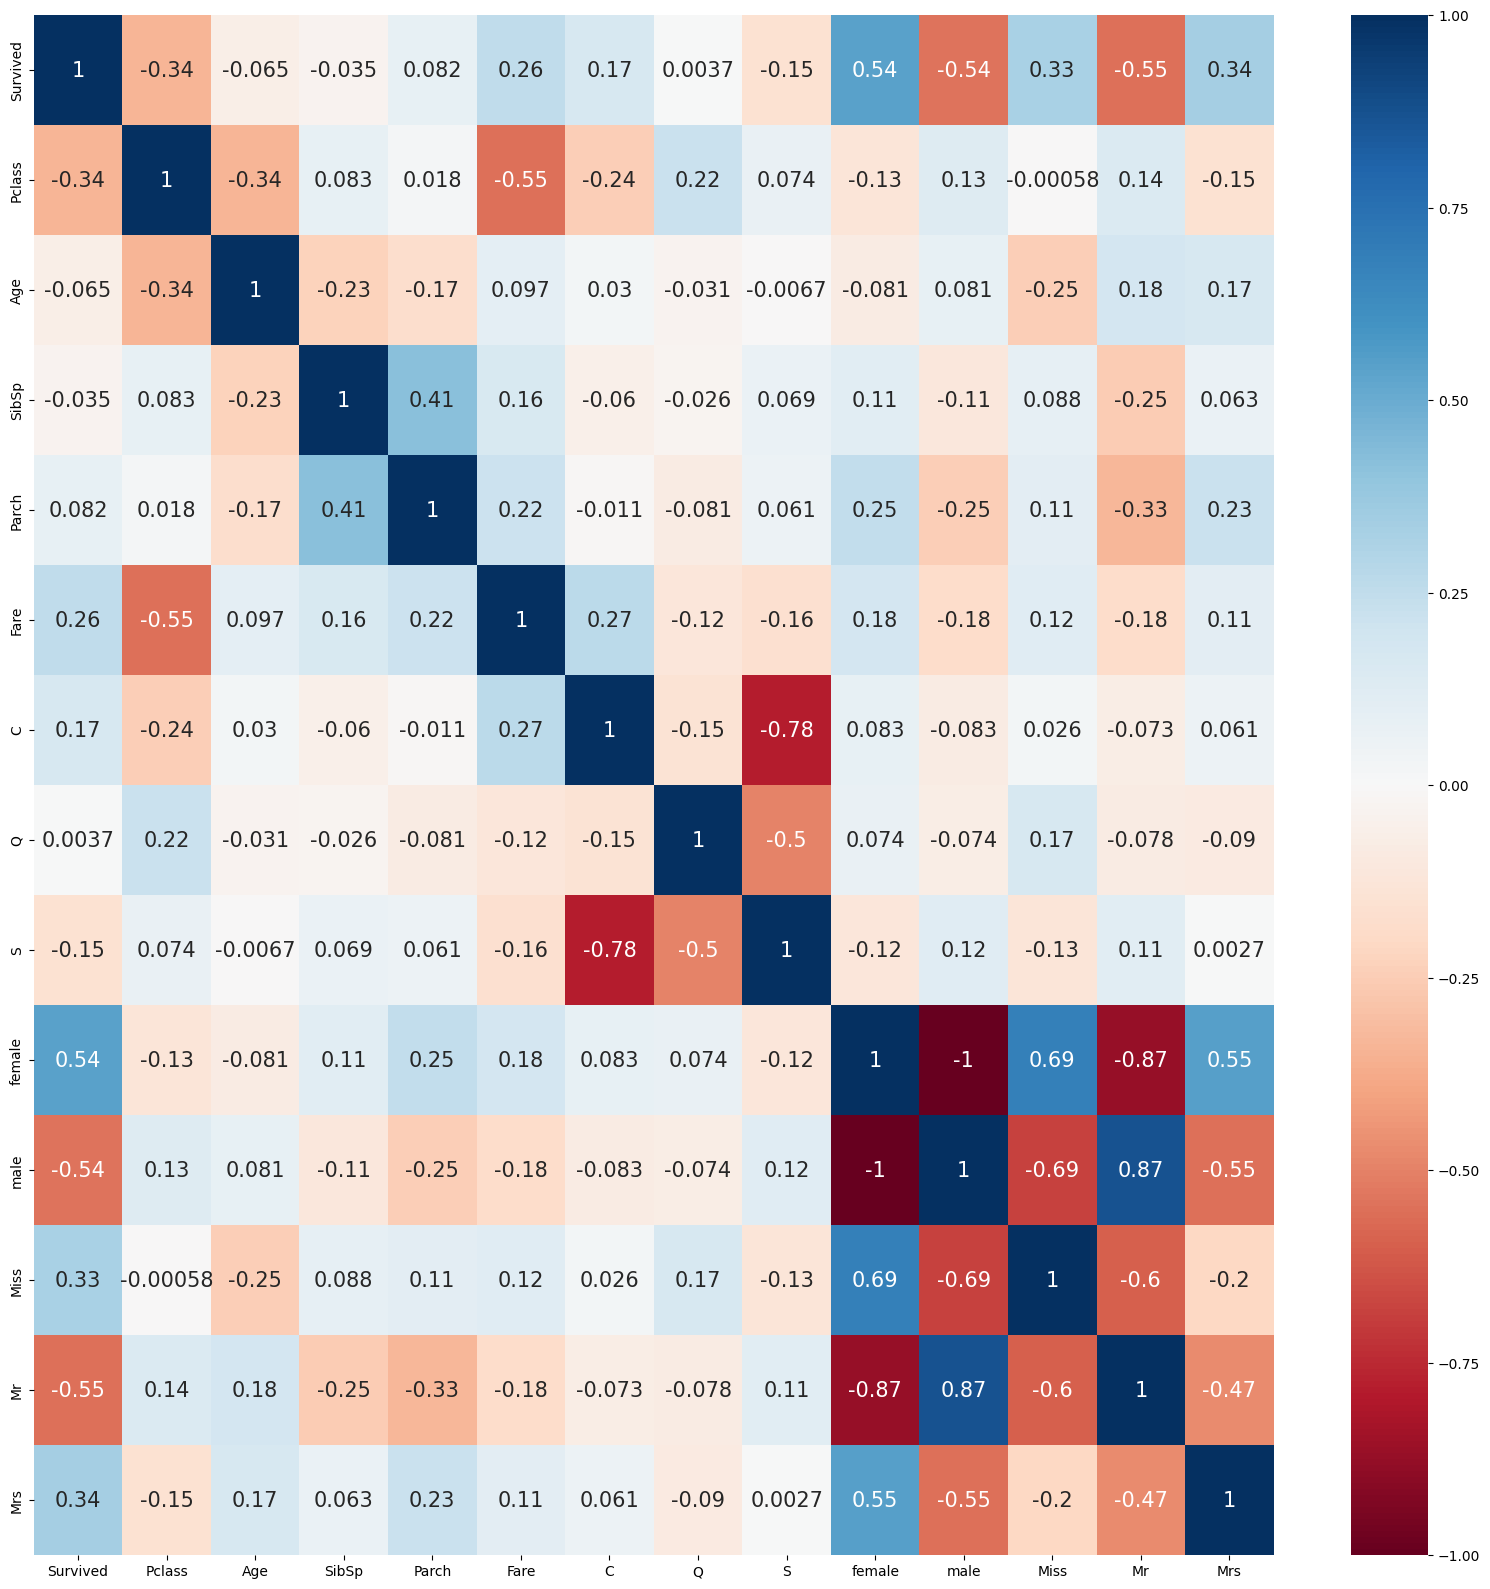

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

traindf.corr()
# .corr() 可以直接找出所有欄位之間的相關係數，但很難看

plt.figure(figsize=(20,20))
sns.heatmap(traindf.astype("float").corr(), annot=True, cmap="RdBu", annot_kws={"fontsize":15})

隨機森林
1. 平行組合
    1. 多個模型 同時進行測試
    2. 每個模型 都要略有不同
    2. 取所有模型的結果 平均 作為最終結果

2. 連續組合
    1. 第一次 測試
    2. 針對第一次錯誤的內容，進行調整
    3. 第二次 測試
    4. 之前隊的有可能變錯的，但持續調整
    5. 第三次 測試
    6. ...
    7. 直到模型趨於完善
  
============================================  
交叉驗證  
1. 之前的方法 : 將資料與答案 都依照特定比例切割 90% 10%  
2. 以10為例 : 將資料與答案都切割成10份   (也是隨機切10份)  
3. 第一次 : 第一份用作驗證 其餘九份用作訓練  
4. 第二次 : 第二份用作驗證 其餘九份用作訓練  
5. 第三次 :  ...  
6. 取十個分數的平均

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
# np 善於處理大量數字


clf = RandomForestClassifier(max_depth=7, n_estimators=20)
# 鐵達尼號資料及比較複雜，所以選擇從5開始 (後續調整，發現7較好)
# 確定好max_depth之後，再開始調整 n_estimators (跟之前一樣，一個一個調整)
# 兩個參數都要一一調整 較麻煩 所以使用 greed search

trainx = traindf.drop(["Survived"], axis=1)
trainy = traindf["Survived"]
# 做成資料集

cross_val_score(clf, trainx, trainy, cv=10)
# cv = 10 將資料切成10份 (通常習慣切10份)

np.average( cross_val_score(clf, trainx, trainy, cv=10) )
# 透過np算平均

0.8226966292134833

In [51]:
from sklearn.model_selection import GridSearchCV


params = {
    "max_depth":range(5, 11),
    "n_estimators":range(20, 31)
}
# max_depth:[5, 6, 7, 8, 9, 10]
# n_estimators:[20, 21, 22, ... 30]

clf = RandomForestClassifier()
s = GridSearchCV(clf, params, cv=5)
# 這邊偷懶一下，切5份就好   (理論上 上面切10份 這邊就要切10份)

s.fit(trainx, trainy)
print(s.best_params_)
# 印出最佳參數 (固定用法，要去看文件)
# (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

print(s.best_score_)
# 印出最佳分數 (固定用法，要去看文件)

# 此方法雖然較好，但仍然有隨機運氣的成分在內

{'max_depth': 8, 'n_estimators': 22}
0.8305442219571904


In [52]:
# 已經透過 Greedsearch 找到最佳參數 與 最佳分數
# 做最後的資料整理之後就可以上傳

testx = testdf.drop(["PassengerId"], axis=1)
testid = testdf["PassengerId"]

clf = RandomForestClassifier(max_depth=6, n_estimators=21)
clf.fit(trainx, trainy)
pre = clf.predict(testx)

result = pd.DataFrame()
result["PassengerId"] = testid
result["Survived"] = pre

result

result.to_csv("Result_of_Titanic.csv", encoding="utf-8", index=False)

In [53]:
# 額外補充
# 最後，隨機森林不項決策樹，可以看出哪些條件比較重要

clf.feature_importances_

array([0.1215385 , 0.08440573, 0.0471651 , 0.04863619, 0.1201315 ,
       0.01240233, 0.00980465, 0.01136895, 0.1983081 , 0.06848455,
       0.02829192, 0.1757682 , 0.07369429])

In [54]:
trainx.columns
# 跟上方 重要性分數 比對使用

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S', 'female',
       'male', 'Miss', 'Mr', 'Mrs'],
      dtype='object')